In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Assign the dow class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [6]:
# Assign the dow class to a variable called `Station`
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

In [8]:
#find date range to query
last = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date, = last
year,month,day = last_date.split('-')
query_date = dt.date(int(year),int(month),int(day)) - dt.timedelta(days=365)
print("Last Date Measured: ",last_date)
print("Query Date: ",query_date)

Last Date Measured:  2017-08-23
Query Date:  2016-08-23


In [9]:
#query for last year's worth of precipitation data and save to dataframe
last_year_precip = pd.DataFrame(session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>query_date).all())
last_year_precip = last_year_precip.set_index('date')
last_year_precip.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


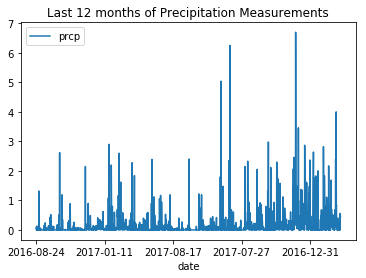

In [10]:
#plot last year's worth of precipitation data
last_year_precip.plot()
plt.title('Last 12 months of Precipitation Measurements')
plt.show()

In [11]:
#print summary statistics
precip_mean = last_year_precip.mean()
precip_median = last_year_precip.median()
precip_mode = last_year_precip.mode()
precip_max = last_year_precip.max()
precip_min = last_year_precip.min()
print(f"The mean")
###################################################################################################

The mean


In [12]:
#find the number of weather stations
num_stations = session.query(Measurement.station).group_by(Measurement.station).count()
print(f'There are {num_stations} weather observation stations.')

There are 9 weather observation stations.


In [13]:
#find the number of observations for each station
station_observations = pd.DataFrame(session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all(),columns=['Station','Number of Measurements'])
station_observations

,Station,Number of Measurements
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
#find the station with the most observations
station_most_observations = station_observations.iloc[0,0]
print(f'The station with the most observations is {station_most_observations} with {station_observations.iloc[0,1]} measurements.')

The station with the most observations is USC00519281 with 2772 measurements.


In [15]:
#query to get last 12 months of tobs data but filter by station with most observations
last_year_temp = pd.DataFrame(session.query(Measurement.date,Measurement.station,Measurement.tobs)\
                              .filter(Measurement.date>query_date).filter(Measurement.station==station_most_observations).all())
last_year_temp = last_year_temp.set_index('date')
last_year_temp.head()

,station,tobs
date,,
2016-08-24,USC00519281,77
2016-08-25,USC00519281,80
2016-08-26,USC00519281,80
2016-08-27,USC00519281,75
2016-08-28,USC00519281,73


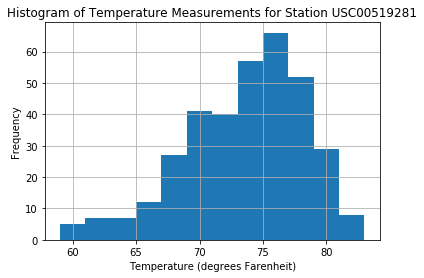

In [16]:
last_year_temp.hist(column='tobs',bins=12)
plt.xlabel('Temperature (degrees Farenheit)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Temperature Measurements for Station {station_most_observations}')
plt.show()

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    # TMIN, TAVG, and TMAX for a list of dates.
    #Args: start_date (string): A date string in the format %Y-%m-%d
    #    end_date (string): A date string in the format %Y-%m-%d
    #Returns: TMIN, TAVE, and TMAX"""
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [18]:
start_date = '2012-02-28'
end_date = '2012-03-05'
date_range = start_date + ' - ' + end_date
tmin,tavg,tmax = calc_temps(start_date, end_date)[0]
tavg_df=pd.DataFrame([tavg],columns=['tavg'],index=[date_range])

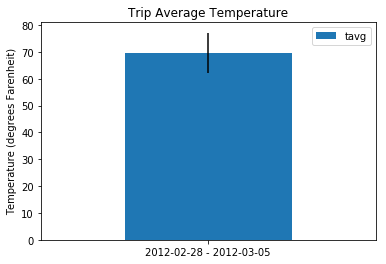

In [19]:
tavg_df.plot(kind='bar',yerr=[[tavg-tmin],[tmax-tavg]])
plt.xticks(rotation='horizontal')
plt.ylabel('Temperature (degrees Farenheit)')
plt.title('Trip Average Temperature')
plt.show()